<a href="https://colab.research.google.com/github/SMAHAM/Scene-Recognization/blob/master/scene_reorganization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal scene reorganization for audio Categorization

# Installation

In [1]:
!pip3 install librosa

In [12]:
from __future__ import print_function

import matplotlib.pyplot as plt
import librosa
import librosa.display

import numpy as np
import pandas as pd


# ---Load the audio as a waveform `y`
# ---Store the sampling rate as `sr`
!wget https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3 -O 13230.mp3
filename = '6508.mp3'
sig, rate = librosa.load(filename, sr=44100)

# ---Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512
print(sig)
print(rate)

--2019-06-15 18:10:06--  https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘13230.mp3’

13230.mp3               [ <=>                ]  64.38K  --.-KB/s    in 0.03s   

2019-06-15 18:10:07 (2.48 MB/s) - ‘13230.mp3’ saved [65927]

[-7.0495605e-03 -8.9111328e-03 -9.4451904e-03 ...  0.0000000e+00
  0.0000000e+00 -1.5258789e-05]
44100


In [0]:
mfcc = librosa.feature.mfcc(y=sig, sr=rate, hop_length=hop_length, n_mfcc=13)

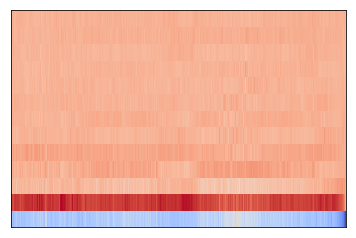

In [10]:

librosa.display.specshow(mfcc, x_coords=None, y_coords=None, x_axis=None, y_axis=None, sr=44100, hop_length=512, fmin=None, fmax=None, bins_per_octave=12, ax=None)


In [0]:
!wget https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3 -O data.mp3

--2019-06-08 18:29:57--  https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data.mp3’

data.mp3                [ <=>                ]  64.36K  --.-KB/s    in 0.03s   

2019-06-08 18:29:57 (2.43 MB/s) - ‘data.mp3’ saved [65905]



6508_spec.png


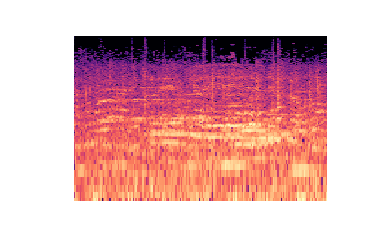

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import librosa.display

import numpy as np
import pandas as pd
import librosa
%matplotlib inline

#filename = librosa.util.example_audio_file()
filename = '6508'
file_ext='.mp3'
y, sr = librosa.load(filename+file_ext)
y = y[:100000] # shorten audio a bit for speed

window_size = 1024
window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window)

# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
plt.subplots_adjust(wspace=0, hspace=0)
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.axis('off')
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
img_name = filename+'_spec.png'
print(img_name)
fig.savefig(img_name)
img=mpimg.imread(img_name)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 15s 258us/sample - loss: 0.2227 - acc: 0.9333
Epoch 2/5
60000/60000 [==============================] - 15s 253us/sample - loss: 0.0968 - acc: 0.9705
Epoch 3/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0699 - acc: 0.9785
Epoch 4/5
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0531 - acc: 0.9834
Epoch 5/5
10000/10000 [==============================] - 1s 60us/sample - loss: 0.0635 - acc: 0.9811


[0.06351860023886838, 0.9811]